## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_results = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_mouse_results.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice in the DataFrame.

mouse_counts= len(combined_mouse_results["Mouse ID"].unique())
mouse_counts



249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id =combined_mouse_results[combined_mouse_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [407]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_details= combined_mouse_results.loc[(combined_mouse_results["Mouse ID"]=='g989')]
dup_mouse_details

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_mouse_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep ="first", inplace = True) 
combined_mouse_results.loc[(combined_mouse_results["Mouse ID"]=='g989')]


Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [26]:
# Checking the number of mice in the clean DataFrame.

mouse_counts= combined_mouse_results["Mouse ID"].nunique()
mouse_counts

249

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

#Store Regimen and tumor volume data 
Regimen_tumor=combined_mouse_results[["Drug Regimen","Tumor Volume (mm3)" ]]

#Calulate required values
summary_mean=Regimen_tumor.groupby(['Drug Regimen']).mean()
summary_median=Regimen_tumor.groupby(['Drug Regimen']).median()
summary_variance=Regimen_tumor.groupby(['Drug Regimen']).var()
summary_std=Regimen_tumor.groupby(['Drug Regimen']).std()
summary_sem=Regimen_tumor.groupby(['Drug Regimen']).sem()

#Merge and rename columns
summary_stats_df1 = pd.merge(summary_mean , summary_median, how="outer", on="Drug Regimen", suffixes=('_mean','_median'))
summary_stats_df2 = pd.merge(summary_variance , summary_std, how="outer", on="Drug Regimen",suffixes=('_variance','_std'))
summary_stats_df = pd.merge(summary_stats_df2 , summary_sem, how="outer", on="Drug Regimen")
summary_stats_df = pd.merge(summary_stats_df1 , summary_stats_df, how="outer", on="Drug Regimen")
summary_stats_df = summary_stats_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume (mm3)_SEM"})



summary_stats_df



,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_variance,Tumor Volume (mm3)_std,Tumor Volume (mm3)_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

#use agg function
grouped_regimon_stats= Regimen_tumor.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})
grouped_regimon_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

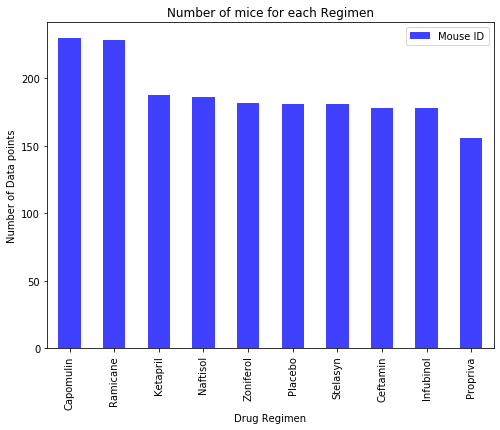

<Figure size 432x288 with 0 Axes>

In [29]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Filter the DataFrame down only to those columns to chart

#Store Regimen and Mouse ID
mice_drug_regimen=combined_mouse_results[["Drug Regimen","Mouse ID" ]]

# Grupby Drug Regimen
Group_mice_regimen = mice_drug_regimen.groupby(['Drug Regimen'])

#count mouse id for each regimen and sort.
count_mice = Group_mice_regimen['Mouse ID'].count().reset_index()
sort_mice=count_mice.sort_values('Mouse ID', ascending=False)

# Use DataFrame.plot() in order to create a bar chart of the data
bar_plot=sort_mice.plot(kind="bar", color='b', alpha=0.75, figsize=(8,6))

# Set textual properties
bar_plot.set_title("Number of mice for each Regimen")
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data points")

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
bar_plot.set_xticklabels(sort_mice["Drug Regimen"])


# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()

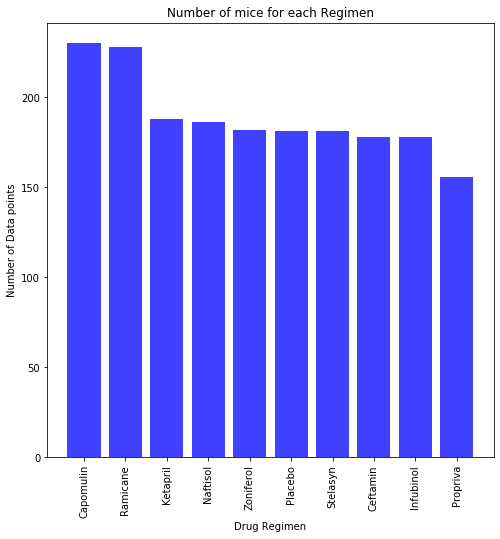

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(sort_mice))
tick_locations = [value for value in x_axis]

# Plot the bar, create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,8))
plt.bar(x_axis, sort_mice["Mouse ID"], color='b', alpha=0.75, align="center")
plt.xticks(tick_locations, sort_mice["Drug Regimen"], rotation="vertical")

# Set textual properties
plt.ylabel("Number of Data points")
plt.xlabel("Drug Regimen")
plt.title("Number of mice for each Regimen")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()

## Pie Plots

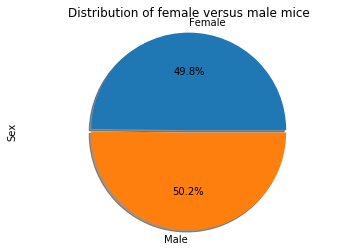

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


#groupby sex for unique value of mouseid
Group_mice_sex = combined_mouse_results["Mouse ID"].groupby([combined_mouse_results["Sex"]]).nunique()

#Plot pie chart using Pandas
list_sex=Group_mice_sex.keys()
explode=[0.025,0]
Group_mice_sex.plot(kind='pie', y=list_sex, autopct='%1.1f%%', title="Distribution of female versus male mice",explode=explode, shadow=True)

# Tells matplotlib that we want a pie chart with equal axes and set ylabel
plt.axis("equal")
plt.ylabel("Sex")

# Show plot
plt.show()



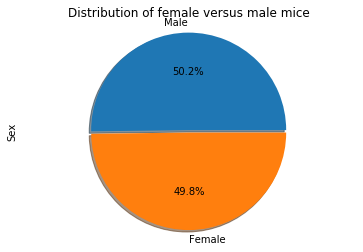

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#get mouse count per sex
Mouse_sex_count=combined_mouse_results.loc[(combined_mouse_results["Timepoint"]==0), :]


# Labels for the sections of our pie chart
labels= Mouse_sex_count["Sex"].unique()

# The values of each section of the pie chart
mouse_sex= Mouse_sex_count["Sex"].value_counts().tolist()

#plot using pyplot
plt.pie(mouse_sex, labels=labels,autopct="%1.1f%%",explode=explode, shadow=True)

# Tells matplotlib that we want a pie chart with equal axes and labels
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Distribution of female versus male mice")

# Show plot
plt.show()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#--------------------------------------------------------------------------------------------------------

#Create max time point column to record the max value of timepoint for each mouse id
combined_mouse_results['Max Time Point'] = combined_mouse_results.groupby('Mouse ID')["Timepoint"].transform('max')

#----------------------
#Capomulin Clculations
#-----------------------

#Get Capomulin data
Capomulin_result=combined_mouse_results.loc[(combined_mouse_results["Drug Regimen"]=='Capomulin')& (combined_mouse_results["Timepoint"]==combined_mouse_results["Max Time Point"]), :]
Capomulin_final_tumor_volume=Capomulin_result['Tumor Volume (mm3)']


# use pandas to give quartile calculations 
quartiles = Capomulin_final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
#Calculate IQR
iqr = upperq-lowerq

#print results
print(f"The lower quartile of Capomulin_final_tumor_volume is: {lowerq}")
print(f"The upper quartile of Capomulin_final_tumor_volumes is: {upperq}")
print(f"The interquartile range of Capomulin_final_tumor_volume is: {iqr}")
print(f"The the median of Capomulin_final_tumor_volume is: {quartiles[0.5]} ")

#Calculate lower and upper bounds and print
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# We need to sort the data to determine which could be outliers
list_Capomulin_final_tumor=Capomulin_final_tumor_volume.tolist()
list_Capomulin_final_tumor.sort()

# find any potential outliers and print result
Capomulin_outlier_occupancy = Capomulin_result.loc[(Capomulin_result['Tumor Volume (mm3)'] < lower_bound) | (Capomulin_result['Tumor Volume (mm3)'] > upper_bound)]
if len(Capomulin_outlier_occupancy)==0:
    print("No Outliers found in Capomulin")
else:
    print(Capomulin_outlier_occupancy)
    


The lower quartile of Capomulin_final_tumor_volume is: 32.37735684
The upper quartile of Capomulin_final_tumor_volumes is: 40.1592203
The interquartile range of Capomulin_final_tumor_volume is: 7.781863460000004
The the median of Capomulin_final_tumor_volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No Outliers found in Capomulin


In [40]:
#----------------------
#Ramicane Clculations
#-----------------------

Ramicane_result=combined_mouse_results.loc[(combined_mouse_results["Drug Regimen"]=='Ramicane')& (combined_mouse_results["Timepoint"]==combined_mouse_results["Max Time Point"]), :]
Ramicane_final_tumor_volume=Ramicane_result['Tumor Volume (mm3)']

# use pandas to give quartile calculations 
quartiles = Ramicane_final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
#Calculate IQR
iqr = upperq-lowerq

#Print results
print(f"The lower quartile of Capomulin_final_tumor_volume is: {lowerq}")
print(f"The upper quartile of Capomulin_final_tumor_volumes is: {upperq}")
print(f"The interquartile range of Capomulin_final_tumor_volume is: {iqr}")
print(f"The the median of Capomulin_final_tumor_volume is: {quartiles[0.5]} ")

#Calculate lower and upper bounds and print result
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# We need to sort the data to determine which could be outliers
list_Ramicane_final_tumor=Ramicane_final_tumor_volume.tolist()
list_Ramicane_final_tumor.sort()

# find any potential outliers and print result
Ramicane_outlier_occupancy = Ramicane_result.loc[(Ramicane_result['Tumor Volume (mm3)'] < lower_bound) | (Ramicane_result['Tumor Volume (mm3)'] > upper_bound)]
if len(Ramicane_outlier_occupancy)==0:
    print("No Outliers found in Ramicane")
else:
    print("Outliers are listed below")
    print(Ramicane_outlier_occupancy)

The lower quartile of Capomulin_final_tumor_volume is: 31.56046955
The upper quartile of Capomulin_final_tumor_volumes is: 40.65900627
The interquartile range of Capomulin_final_tumor_volume is: 9.098536719999998
The the median of Capomulin_final_tumor_volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No Outliers found in Ramicane


In [37]:
#----------------------
#Infubinol Clculations
#-----------------------

Infubinol_result=combined_mouse_results.loc[(combined_mouse_results["Drug Regimen"]=='Infubinol')& (combined_mouse_results["Timepoint"]==combined_mouse_results["Max Time Point"]), :]
Infubinol_final_tumor_volume=Infubinol_result['Tumor Volume (mm3)']


# use pandas to give quartile calculations 
quartiles = Infubinol_final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
#Calculate IQR
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin_final_tumor_volume is: {lowerq}")
print(f"The upper quartile of Capomulin_final_tumor_volumes is: {upperq}")
print(f"The interquartile range of Capomulin_final_tumor_volume is: {iqr}")
print(f"The the median of Capomulin_final_tumor_volume is: {quartiles[0.5]} ")

#Calculate lower and upper bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# We need to sort the data to determine which could be outliers
list_Infubinol_final_tumor=Infubinol_final_tumor_volume.tolist()
list_Infubinol_final_tumor.sort()
list_Infubinol_final_tumor


# find any potential outliers
Infubinol_outlier_occupancy = Infubinol_result.loc[(Infubinol_result['Tumor Volume (mm3)'] < lower_bound) | (Infubinol_result['Tumor Volume (mm3)'] > upper_bound)]
if len(Infubinol_outlier_occupancy)==0:
    print("No Outliers found in Infubinol")
else:
    print("Outliers are listed below")
    print(Infubinol_outlier_occupancy)
    


The lower quartile of Capomulin_final_tumor_volume is: 54.04860769
The upper quartile of Capomulin_final_tumor_volumes is: 65.52574285
The interquartile range of Capomulin_final_tumor_volume is: 11.477135160000003
The the median of Capomulin_final_tumor_volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers are listed below
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  Max Time Point  
669           36.321346                 0               5  


In [38]:
#----------------------
#Ceftamin Clculations
#-----------------------

Ceftamin_result=combined_mouse_results.loc[(combined_mouse_results["Drug Regimen"]=='Ceftamin')& (combined_mouse_results["Timepoint"]==combined_mouse_results["Max Time Point"]), :]
Ceftamin_final_tumor_volume=Ceftamin_result['Tumor Volume (mm3)']

# use pandas to give quartile calculations 
quartiles = Ceftamin_final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
#Calculate IQR
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin_final_tumor_volume is: {lowerq}")
print(f"The upper quartile of Capomulin_final_tumor_volumes is: {upperq}")
print(f"The interquartile range of Capomulin_final_tumor_volume is: {iqr}")
print(f"The the median of Capomulin_final_tumor_volume is: {quartiles[0.5]} ")

#Calculate lower and upper bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# We need to sort the data to determine which could be outliers
list_Ceftamin_final_tumor=Ceftamin_final_tumor_volume.tolist()
list_Ceftamin_final_tumor.sort()

# find any potential outliers
Ceftamin_outlier_occupancy = Ceftamin_result.loc[(Ceftamin_result['Tumor Volume (mm3)'] < lower_bound) | (Ceftamin_result['Tumor Volume (mm3)'] > upper_bound)]
if len(Ceftamin_outlier_occupancy)==0:
    print("No Outliers found in Ceftamin")
else:
    print("Outliers are listed below")
    print(Ceftamin_outlier_occupancy)

The lower quartile of Capomulin_final_tumor_volume is: 48.72207785
The upper quartile of Capomulin_final_tumor_volumes is: 64.29983003
The interquartile range of Capomulin_final_tumor_volume is: 15.577752179999997
The the median of Capomulin_final_tumor_volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
No Outliers found in Ceftamin


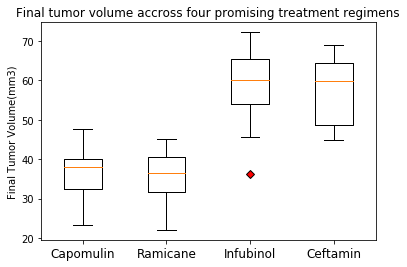

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Set textual properties
red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume accross four promising treatment regimens')
ax1.set_ylabel('Final Tumor Volume(mm3)')
xtickNames = plt.setp(ax1, xticklabels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.setp(xtickNames, fontsize=12)

# Plot box plot
ax1.boxplot([Capomulin_final_tumor_volume,Ramicane_final_tumor_volume,Infubinol_final_tumor_volume,Ceftamin_final_tumor_volume],flierprops=red_diamond)

# Show plot
plt.show()

## Line and Scatter Plots

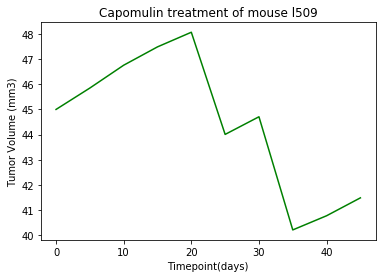

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a series for mouseid l509 using Capomulin
sample_data=combined_mouse_results.loc[(combined_mouse_results["Drug Regimen"]=='Capomulin')& (combined_mouse_results["Mouse ID"]=="l509"), :]
sample_data

#set x and y axis values
y_timepoint=sample_data["Timepoint"]
x_tumorvolume=sample_data["Tumor Volume (mm3)"]

# Plot our line to show time point versus tumor volume for mouse l509 treated with Capomulin
plt.plot(y_timepoint, x_tumorvolume, color="green")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

# Show plot
plt.show()

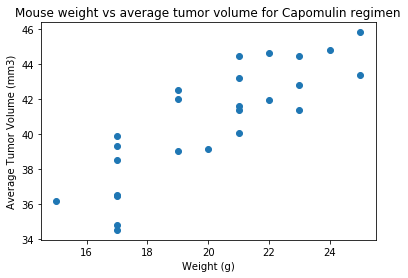

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create a series for regimen Capomulin
sample_data_Capomulin=combined_mouse_results.loc[(combined_mouse_results["Drug Regimen"]=='Capomulin'),:]

#groupby mouseid and get mean
Group_mice_size = sample_data_Capomulin.groupby([sample_data_Capomulin["Mouse ID"]]).mean()

#plot scatter of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(Group_mice_size['Weight (g)'],Group_mice_size['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight vs average tumor volume for Capomulin regimen")

# Show plot
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717
The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


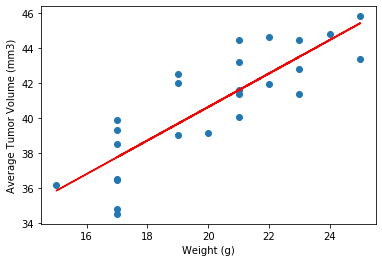

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = Group_mice_size['Weight (g)']
y_values = Group_mice_size['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#plot scatter of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#print r-squqred value
print(f"The r-squared is: {rvalue**2}")

#calculate correlation coefficient and print
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")